<a href="https://colab.research.google.com/github/vrhughes/DS3001Group/blob/main/Results/Group%20Stage%20Data/VH_Data_kaggle1_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cloning the data over from Github
! git clone https://github.com/vrhughes/DS3001Group

Cloning into 'DS3001Group'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 347 (delta 125), reused 7 (delta 7), pack-reused 126 (from 1)
Receiving objects: 100% (347/347), 2.40 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (167/167), done.


In [2]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Saving all of the group AND finals data to a dataframe variable
data = pd.read_csv('https://raw.githubusercontent.com/vrhughes/DS3001Group/main/Data/kaggle1.csv')

# Taking an initial look at the data
#display(data)

# Removing variables that are superfluous and/or unrelated to match performance
data = data.drop(['date', 'hour', 'left channel team1', 'left channel team2', 'left inside channel team1', 'left inside channel team2', 'central channel team1', 'central channel team2', 'right inside channel team1', 'right inside channel team2', 'right channel team1', 'right channel team2', 'own goals team1', 'own goals team2', 'possession in contest'], axis=1)
data = data.drop(['total offers to receive team1', 'total offers to receive team2', 'inbehind offers to receive team1', 'inbehind offers to receive team2', 'inbetween offers to receive team1', 'inbetween offers to receive team2', 'infront offers to receive team1', 'infront offers to receive team2', 'receptions between midfield and defensive lines team1', 'receptions between midfield and defensive lines team2', 'attempted line breaks team1', 'attempted line breaks team2', 'completed line breaksteam1', 'completed line breaks team2', 'attempted defensive line breaks team1', 'attempted defensive line breaks team2', 'switches of play completed team1', 'switches of play completed team2'], axis=1)

# Adjusting the names of some incorrect data
data = data.rename(columns={'attempts inside the penalty area  team2': 'attempts inside the penalty area team2'})
data = data.rename(columns={'attempts outside the penalty area  team1': 'attempts outside the penalty area team1'})
data = data.rename(columns={'attempts outside the penalty area  team2': 'attempts outside the penalty area team2'})
data = data.rename(columns={'completed defensive line breaksteam1': 'completed defensive line breaks team1'})

# Because our only goal with this data is to look at group stage results, we'll remove finals data
group_stage_data = data[data['category'].str.contains('Group')].copy()
# Removed about 16 rows of finals data

# Adding another column to the group_stage_data that's true if team1 has more goals and false if team2 has more goals:
group_stage_data['team1 won'] = group_stage_data['number of goals team1'] > group_stage_data['number of goals team2']
#group_stage_data.head()

Now that we've removed most of the irrelevant data we have a clearer view and can ask some questions.



In [ ]:
####################################################################################################

Now I'll look at if there's any significant correlation between the percentage of the time that a team had possession of the ball and whether or not they won a particular game.



In [4]:
# Creating an array more_possesion_wins2 that iterates through group_stage_data and increase by one if possession team1 is greater than possession team2 and team1 won is true:
more_possession_wins = 0
less_possession_wins = 0
for i in range(len(group_stage_data)):
  if group_stage_data['possession team1'][i] > group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == True:
    more_possession_wins += 1
  elif group_stage_data['possession team1'][i] < group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == True:
    less_possession_wins += 1
  if group_stage_data['possession team1'][i] < group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == False:
    more_possession_wins += 1
  elif group_stage_data['possession team1'][i] > group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == False:
    less_possession_wins += 1

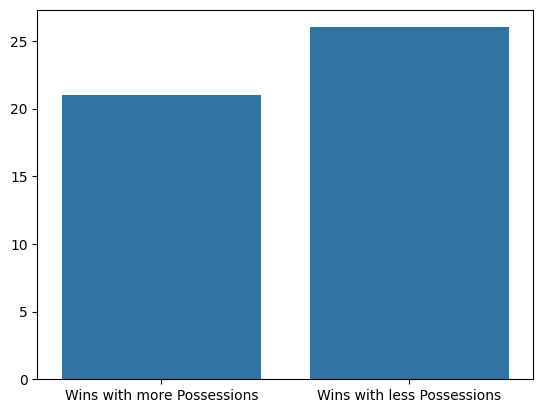

In [5]:
# Making a bar graph of the more_possessions_wins and more_possessions_losses data:
# The x_axis will have labels Wins and Losses, and the data will by on the y_axis:
sns.barplot(x=['Wins with more Possessions', 'Wins with less Possessions'], y=[more_possession_wins, less_possession_wins])
plt.show()


This is interesting, because it seems there isn't a large correlation between have possession of the ball and actually winning a game. This result can be used to inform how we model the finals matches with the other data.

In [ ]:
####################################################################################################


I'll now do a similar analysis, but with the number of attempted goals per team. It'll be intersting to see if there's a better correlation between this variable and winning a match.

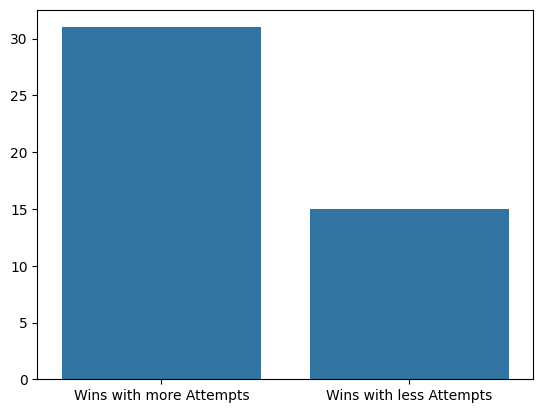

In [6]:
more_attempts_wins = 0
less_attempts_wins = 0
for i in range(len(group_stage_data)):
  if group_stage_data['total attempts team1'][i] > group_stage_data['total attempts team2'][i] and group_stage_data['team1 won'][i] == True:
    more_attempts_wins += 1
  elif group_stage_data['total attempts team1'][i] < group_stage_data['total attempts team2'][i] and group_stage_data['team1 won'][i] == True:
    less_attempts_wins += 1
  if group_stage_data['total attempts team1'][i] < group_stage_data['total attempts team2'][i] and group_stage_data['team1 won'][i] == False:
    more_attempts_wins += 1
  elif group_stage_data['total attempts team1'][i] > group_stage_data['total attempts team2'][i] and group_stage_data['team1 won'][i] == False:
    less_attempts_wins += 1

sns.barplot(x=['Wins with more Attempts', 'Wins with less Attempts'], y=[more_attempts_wins, less_attempts_wins])
plt.show()

This data is more conclusive! It shows that teams which make more scoring attempts (even if they miss them) tend to win more frequently than teams making less attempts.



In [ ]:
####################################################################################################


Given how limited our data is, it will be difficult to run a comprehensive regession on the outcome of the finals matches.

We will run a logit regression on the deltas (differences) between the variables corresponding to team1 and team2 that can then be used to predict individual match outcomes.

In [7]:
# Creating a new dataframe that represents the differences between team1 and team2 for each variable
deltas = group_stage_data[['team1 won']].copy()

deltas['possession'] = group_stage_data['possession team1'].str.rstrip('%').astype('float') / 100.0 - group_stage_data['possession team2'].str.rstrip('%').astype('float') / 100.0
deltas['total attempts'] = group_stage_data['total attempts team1'] - group_stage_data['total attempts team2']
deltas['conceded'] = group_stage_data['conceded team1'] - group_stage_data['conceded team2']
deltas['goal inside the penalty area'] = group_stage_data['goal inside the penalty area team1'] - group_stage_data['goal inside the penalty area team2']
deltas['goal outside the penalty area'] = group_stage_data['goal outside the penalty area team1'] - group_stage_data['goal outside the penalty area team2']
deltas['assists'] = group_stage_data['assists team1'] - group_stage_data['assists team2']
deltas['on target attempts'] = group_stage_data['on target attempts team1'] - group_stage_data['on target attempts team2']
deltas['off target attempts'] = group_stage_data['off target attempts team1'] - group_stage_data['off target attempts team2']
deltas['attempts inside the penalty area'] = group_stage_data['attempts inside the penalty area team1'] - group_stage_data['attempts inside the penalty area team2']
deltas['attempts outside the penalty area'] = group_stage_data['attempts outside the penalty area team1'] - group_stage_data['attempts outside the penalty area team2']
deltas['completed defensive line breaks'] = group_stage_data['completed defensive line breaks team1'] - group_stage_data['completed defensive line breaks team2']
deltas['yellow cards'] = group_stage_data['yellow cards team1'] - group_stage_data['yellow cards team2']
deltas['red cards'] = group_stage_data['red cards team1'] - group_stage_data['red cards team2']
deltas['fouls against'] = group_stage_data['fouls against team1'] - group_stage_data['fouls against team2']
deltas['offsides'] = group_stage_data['offsides team1'] - group_stage_data['offsides team2']
deltas['passes'] = group_stage_data['passes team1'] - group_stage_data['passes team2']
deltas['passes completed'] = group_stage_data['passes completed team1'] - group_stage_data['passes completed team2']
deltas['crosses'] = group_stage_data['crosses team1'] - group_stage_data['crosses team2']
deltas['crosses completed'] = group_stage_data['crosses completed team1'] - group_stage_data['crosses completed team2']
deltas['corners'] = group_stage_data['corners team1'] - group_stage_data['corners team2']
deltas['free kicks'] = group_stage_data['free kicks team1'] - group_stage_data['free kicks team2']
deltas['penalties scored'] = group_stage_data['penalties scored team1'] - group_stage_data['penalties scored team2']
deltas['goal preventions'] = group_stage_data['goal preventions team1'] - group_stage_data['goal preventions team2']
deltas['forced turnovers'] = group_stage_data['forced turnovers team1'] - group_stage_data['forced turnovers team2']
deltas['defensive pressures applied'] = group_stage_data['defensive pressures applied team1'] - group_stage_data['defensive pressures applied team2']

Here we are now building our regression:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into X, our predictor variables, and Y, what we're trying to predict
# The X dataframe is the deltas dataframe without the first column
X = deltas.iloc[:, 1:]
# The Y dataframe is the first column of the deltas dataframe
Y = deltas.iloc[:, 0]

# Making an instance of the linear regression model
log_reg = LogisticRegression(max_iter=1000)

# Fitting the model to the data
log_reg.fit(X, Y)

LogisticRegression(max_iter=1000)

Taking the average performance of every team:

In [9]:
# Creating arrays for each team that represent the averages of all of their performances from individual group stage matches:
team_data = group_stage_data.copy()

# Cleaning up the team_data DF:
team_data = team_data.drop(['category'], axis=1)
team_data = team_data.drop(['team1 won'], axis=1)
team_data = team_data.drop(['number of goals team1'], axis=1)
team_data = team_data.drop(['number of goals team2'], axis=1)
team_data['possession team1'] = team_data['possession team1'].str.rstrip('%').astype('float') / 100.0
team_data['possession team2'] = team_data['possession team2'].str.rstrip('%').astype('float') / 100.0

# Splitting team_data into two dataframes, one for team1 and one for team2
team1_data = team_data.iloc[:, ::2]
team2_data = team_data.iloc[:, [i for i in range(team_data.shape[1]) if i % 2 != 0]]
# For the two new indicies, I'll remove the term "team1" or "team2" from the column headers for every header but the one at index zero
team1_data.columns = [team1_data.columns[0]] + [col.replace('team1', '') for col in team1_data.columns[1:]]
team2_data.columns = [team2_data.columns[0]] + [col.replace('team2', '') for col in team2_data.columns[1:]]
# Changing the names of the first column in both dataframes
team1_data = team1_data.rename(columns={team1_data.columns[0]: 'team'})
team2_data = team2_data.rename(columns={team2_data.columns[0]: 'team'})
# Recombining the team1_data and team2_data DFs back into team_data
team_data = pd.concat([team1_data, team2_data], axis=0)

# Generating dataframes for each team that takes into account their averages from each match
team_averages = team_data.groupby('team').mean()

---

Here we begin simulating matches:

In [10]:
# Now I'll use the team_averages dataframe to simulate the performance of various teams using the logit regression I conducted earlier

# This function takes as input two teams from the team_averages DF and returns an array formatted to be used with log_reg
def create_matchup_data(team1, team2):
       team1_stats = team_averages.loc[team1]
       team2_stats = team_averages.loc[team2]
       delta = team1_stats - team2_stats
       # Strip whitespace from column names to ensure consistency
       delta = delta.rename(index=lambda x: x.strip())

       return pd.DataFrame([delta.values], columns=delta.index)

In [11]:
team_names = team_averages.index.tolist()
num_teams = len(team_names)
win_probability_matrix = np.zeros((num_teams, num_teams))

# Creating a matrix to show the likely outcomes of all possible team combinations
for i in range(num_teams):
    for j in range(num_teams):
        if i != j:  # Avoid comparing a team to itself
            team1 = team_names[i]
            team2 = team_names[j]
            matchup_data = create_matchup_data(team1, team2)  # Using my existing function
            probabilities = log_reg.predict_proba(matchup_data)[0]
            win_probability_matrix[i, j] = probabilities[1]  # Probability of team1 winning

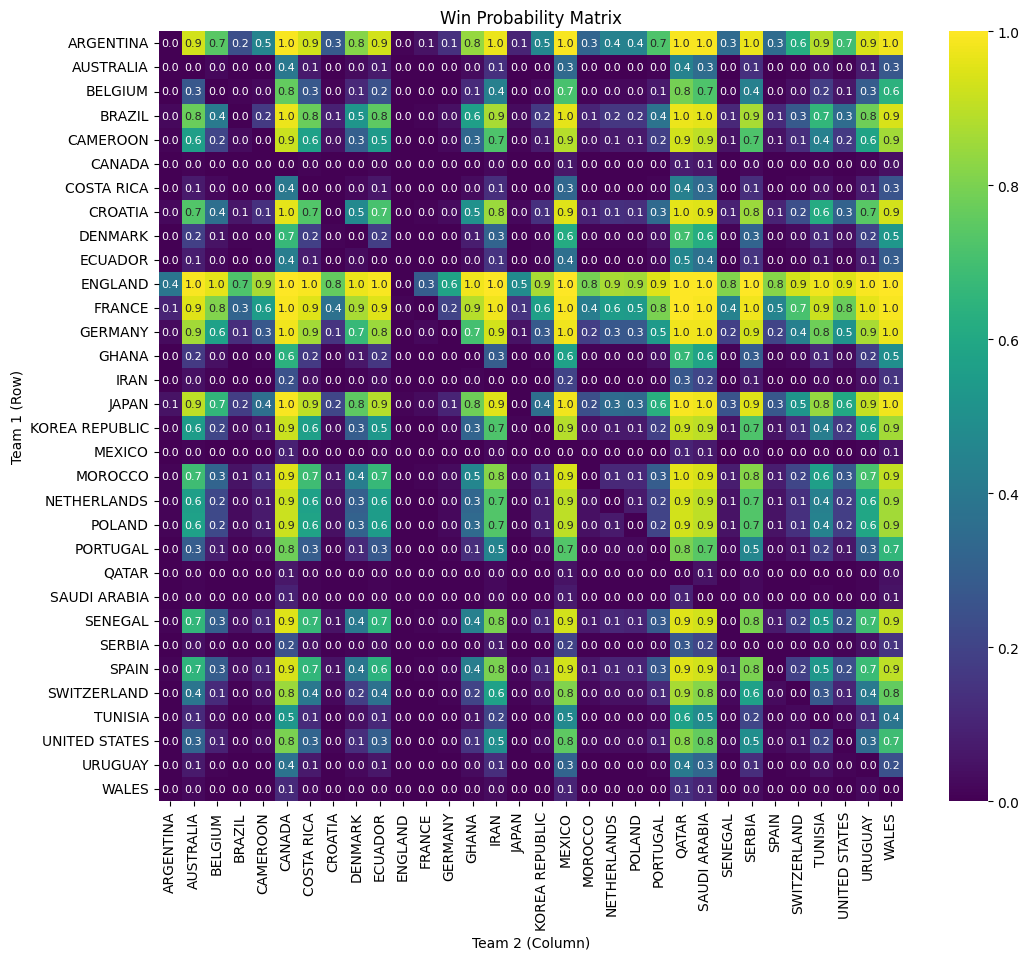

In [12]:
# Displaying the win probability matrix with seaborne
# Each element represents the likelihood the row will beat the corresponding column
rounded_matrix = np.round(win_probability_matrix, 2)

plt.figure(figsize=(12, 10))
sns.heatmap(rounded_matrix, annot=True, fmt=".1f", cmap="viridis",
            xticklabels=team_names, yticklabels=team_names,
            annot_kws={"size": 8})
plt.title("Win Probability Matrix")
plt.xlabel("Team 2 (Column)")
plt.ylabel("Team 1 (Row)")
plt.show()

^^^ If the matrix prints a 1.0 that means that the team on the y is going to win, not the team on the x!

In [ ]:
####################################################################################################

Now I'll generate some random elimination match-ups and use team_averages and log_reg to simulate their outcomes.

This code now does a proper knock-out style tournament instead of just comparing each team to each team.



In [19]:
# This function will be used to determine which team moves forward in the elimination bracket
def simulate_match(team1, team2):
       matchup_data = create_matchup_data(team1, team2)  # Using my existing function
       probabilities = log_reg.predict_proba(matchup_data)[0]
       # Determine the winner based on probabilities
       if probabilities[1] > 0.5:  # Team1 has higher probability
           return team1
       else:
           return team2

# This is how a tournament will be simulated
def simulate_tournament(teams):
       random.shuffle(teams)  # Randomly seed the tournament
       current_round = teams
       while len(current_round) > 1:
           next_round = []
           for i in range(0, len(current_round), 2):
               team1 = current_round[i]
               team2 = current_round[i + 1] if i + 1 < len(current_round) else None  # Handle byes
               if team2 is not None:
                   winner = simulate_match(team1, team2)
                   next_round.append(winner)
               else:
                   next_round.append(team1)  # Team with a bye advances
           current_round = next_round
       return current_round[0]  # Return the tournament winner

In [20]:
# Now I'll run multiple tournaments to get the teams most likely to win on average

num_simulatons = 100
tournament_winners = []

for _ in range(num_simulatons):
    teams = team_averages.index.tolist()  # Get the list of teams
    tournament_winners.append(simulate_tournament(teams))

# Now I'll print the likelihood each team from tournament_winners will win that round of draws
tournament_winner_counts = pd.Series(tournament_winners).value_counts()
print(tournament_winner_counts)

ENGLAND        49
FRANCE         26
ARGENTINA       7
JAPAN           6
SENEGAL         4
CROATIA         2
BRAZIL          2
GERMANY         1
SPAIN           1
POLAND          1
NETHERLANDS     1
Name: count, dtype: int64


In most simulations England is heavily favored to win... This is likely due to the small amount of data we are working with. I'll use a semi-Bayesian approach to lower how much confidence the model has that England will win. This may show other behaviors of the model that better replicate the real world.

In [21]:
# Multiplying the log_reg model by a number less than 1 to reduce how much it favors England

# Scaling the coefficients and intercept by some value
scale = 0.7
log_reg_2 = log_reg

log_reg_2.coef_ = log_reg.coef_ * scale # scale coefficients after fitting
log_reg_2.intercept_ = log_reg.intercept_ * scale # scale intercept after fitting

In [22]:
# Updating the simulation functions to be used with this new regression
def simulate_match_2(team1, team2):
       matchup_data = create_matchup_data(team1, team2)  # Using my existing function
       probabilities = log_reg_2.predict_proba(matchup_data)[0]
       # Determine the winner based on probabilities
       if probabilities[1] >= 0.5:  # Team1 has higher probability
           return team1
       else:
           return team2
def simulate_tournament_2(teams):
       random.shuffle(teams)  # Randomly seed the tournament
       current_round = teams
       while len(current_round) > 1:
           next_round = []
           for i in range(0, len(current_round), 2):
               team1 = current_round[i]
               team2 = current_round[i + 1] if i + 1 < len(current_round) else None  # Handle byes
               if team2 is not None:
                   winner = simulate_match_2(team1, team2)
                   next_round.append(winner)
               else:
                   next_round.append(team1)  # Team with a bye advances
           current_round = next_round
       return current_round[0]  # Return the tournament winner

# Now I'll run some more simulated tournaments with this new model
num_simulatons = 100
tournament_winners = []

for _ in range(num_simulatons):
    teams = team_averages.index.tolist()  # Get the list of teams
    tournament_winners.append(simulate_tournament_2(teams))

# Now I'll print the likelihood each team from tournament_winners will win that round of draws
tournament_winner_counts = pd.Series(tournament_winners).value_counts()
print(tournament_winner_counts)

ENGLAND      53
JAPAN        13
FRANCE        8
ARGENTINA     7
SPAIN         5
CROATIA       4
SENEGAL       3
CAMEROON      3
BRAZIL        3
GERMANY       1
Name: count, dtype: int64


Interestingly, scaling the entire model by s<1 doesn't have much effect on the outcome of repeated tournament draws. This could be because the behavior of the model that favors England isn't related to the scale of its coefficients or intercept.

In [ ]:
####################################################################################################

In [23]:
# world rankings going into the WC
rankings = {'BRAZIL' : 1,
            'BELGIUM' : 2,
            'ARGENTINA' : 3,
            'FRANCE' : 4,
            'ENGLAND' : 5,
            'SPAIN' : 7,
            'NETHERLANDS' : 8,
            'PORTUGAL' : 9,
            'DENMARK' : 10,
            'GERMANY' : 11,
            'CROATIA' : 12,
            'MEXICO' : 13,
            'URUGUAY' : 14,
            'SWITZERLAND' : 15,
            'UNITED STATES' : 16,
            'SENEGAL' : 18,
            'WALES' : 19,
            'IRAN' : 20,
            'SERBIA' : 21,
            'MOROCCO' : 22,
            'JAPAN' : 24,
            'POLAND' : 26,
            'KOREA REPUBLIC' : 28,
            'TUNISIA' : 30,
            'COSTA RICA' : 31,
            'AUSTRALIA' : 38,
            'CANADA' : 41,
            'CAMEROON' : 43,
            'ECUADOR' : 44,
            'QATAR' : 50,
            'SAUDI ARABIA' : 51,
            'CAMEROON' : 61}